# Training - One sample

In [1]:
import numpy as np
import tensorflow as tf

### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
X = data[:,0:1]
y = data[:,1:]
N = X.shape[0]

X = np.c_[np.ones((N, 1)), X]

print(X)
print(y)

[[1.  6.7]
 [1.  4.6]
 [1.  3.5]
 [1.  5.5]]
[[9.1]
 [5.9]
 [4.6]
 [6.7]]


In [2]:
# theta [b, W]
theta = tf.Variable([[0.0], 
                     [0.0]], 
                    dtype=tf.float64)
print(theta)

# forward
def compute_output(X, theta):
    return tf.transpose(theta)@X

# some params
lr = 0.01
epochs = 20
losses = []

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[0.],
       [0.]])>


In [3]:
# training
for epoch in range(epochs):
    for x_data, y_data in zip(X, y):        
        # reshape -> (2,1)
        x_data = tf.reshape(x_data, (2,1))
                
        with tf.GradientTape() as t:
            # y_hat
            y_hat = compute_output(theta, x_data)

            # loss       
            loss = tf.square(y_hat - y_data)

        # debug
        losses.append(loss[0][0].numpy())

        # gradient
        dtheta = t.gradient(loss, theta)

        # update: sgd-optimizer
        theta.assign_sub(lr*dtheta)

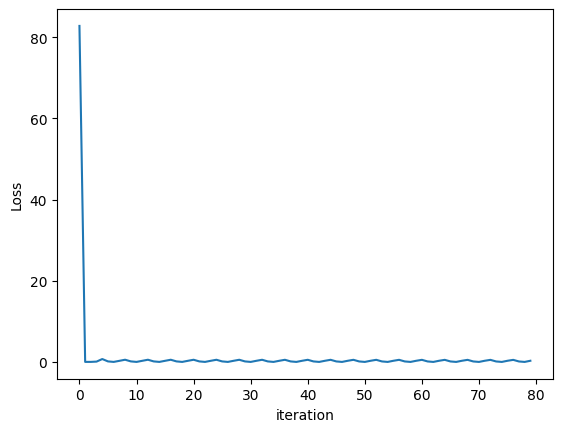

In [4]:
import matplotlib.pyplot as plt

# plot losses
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

# Training - N samples

In [5]:
import numpy as np
import tensorflow as tf

### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
X = data[:,0:1]
y = data[:,1:]
N = X.shape[0]

X = np.c_[np.ones((N, 1)), X]

print(X)
print(y)

[[1.  6.7]
 [1.  4.6]
 [1.  3.5]
 [1.  5.5]]
[[9.1]
 [5.9]
 [4.6]
 [6.7]]


In [6]:
# theta [b, W]
theta = tf.Variable([[0.0], 
                     [0.0]], 
                    dtype=tf.float64)

# forward
def compute_output(X, theta):
    return X@theta

# some params
lr = 0.01
epochs = 20
losses = []

# training
for epoch in range(epochs):
    with tf.GradientTape() as t:
        # y_hat
        y_hat = compute_output(X, theta)
        
        # loss
        loss = tf.reduce_mean(tf.square(y_hat - y))
                
    # debug
    losses.append(loss.numpy())
        
    # gradient        
    dtheta = t.gradient(loss, theta)

    # update
    theta.assign_sub(lr*dtheta)

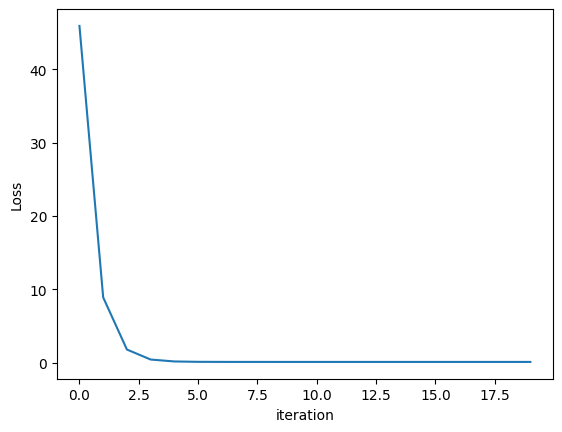

In [7]:
import matplotlib.pyplot as plt

# plot losses
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [8]:
y_hat = compute_output(X, theta)
print(y_hat)

tf.Tensor(
[[8.64880289]
 [6.00786876]
 [4.62452232]
 [7.13969767]], shape=(4, 1), dtype=float64)
